# Tutorial of pattern-causality python package

Now the [R package](https://CRAN.R-project.org/package=patterncausality) and [Python package](https://pypi.org/project/pattern-causality/) have been completed, for more information, please find the [GitHub page](https://github.com/skstavroglou/pattern_causality_py).

This tutorial will use climate indices dataset as the example data.

First of all, we need to load the data, the **pattern-causality** package already has a dataset, you can use function `load_data` to import this dataset.

In [9]:
from pattern_causality import pattern_causality, load_data

# Load the included climate indices dataset
data = load_data()

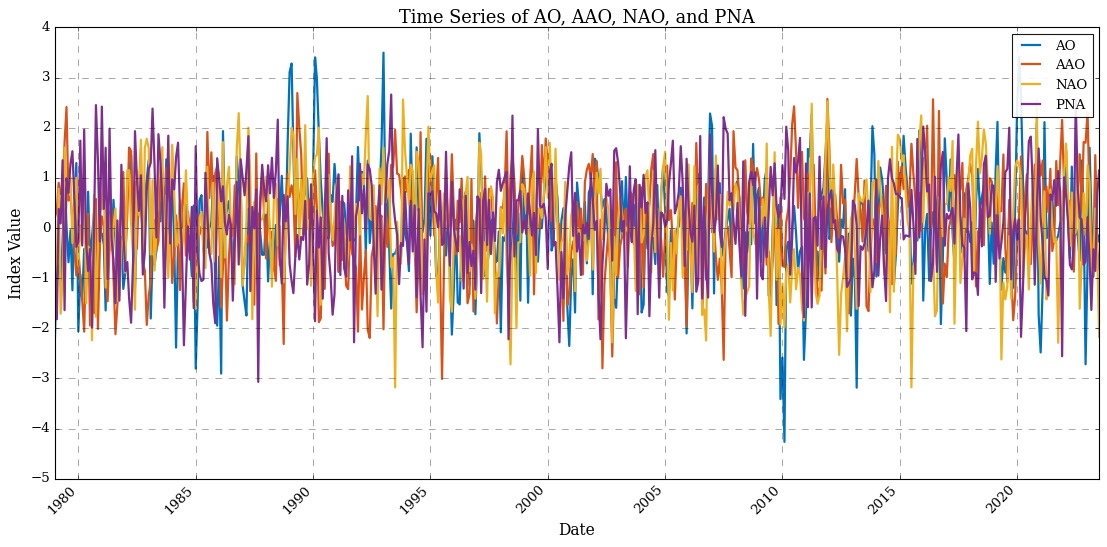

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D


data['Date'] = pd.to_datetime(data['Date'])

plt.style.use('classic')
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "DejaVu Serif"]

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(data['Date'], data['AO'], label='AO', linewidth=2, color=(0, 0.4470, 0.7410))
ax.plot(data['Date'], data['AAO'], label='AAO', linewidth=2, color=(0.8500, 0.3250, 0.0980))
ax.plot(data['Date'], data['NAO'], label='NAO', linewidth=2, color=(0.9290, 0.6940, 0.1250))
ax.plot(data['Date'], data['PNA'], label='PNA', linewidth=2, color=(0.4940, 0.1840, 0.5560))

ax.axhline(0, color='gray', linewidth=0.8, linestyle='--', alpha=0.7)

ax.set_title('Time Series of AO, AAO, NAO, and PNA', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Index Value', fontsize=14)

ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate(rotation=45)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(fontsize=12, frameon=True, framealpha=0.9)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


## Basic Usage

In the newest version of **pattern-causality** package, we need to initialize the `pattern_causality` class firstly, we can also set some relevant parameters before other steps by this class.

In [23]:
# Initialize pattern causality analyzer
pc = pattern_causality(verbose=True)

Then we start the basic usage of this class, we can use `pc_lightweight` function to calculate the PC result easily.

In [36]:
# Analyze causality between NAO and AAO indices
results = pc.pc_lightweight(
    X=data["NAO"].values,
    Y=data["AAO"].values,
    E=3,          # embedding dimension
    tau=1,        # time delay
    metric="euclidean",
    h=1,          # prediction horizon
    weighted=True # use weighted calculations
)


Input Statistics:
X: mean=0.067, std=1.044
Y: mean=0.108, std=0.984
Correlation: 0.058
Series length: 535

Initializing computation with E=3, tau=1, h=1
Calculating state space and signatures...

Processing time series...
Total time points to analyze: 526

Progress: 52/526 points processed (9.9%)
Progress: 104/526 points processed (19.8%)
Progress: 156/526 points processed (29.7%)
Progress: 208/526 points processed (39.5%)
Progress: 260/526 points processed (49.4%)
Progress: 312/526 points processed (59.3%)
Progress: 364/526 points processed (69.2%)
Progress: 416/526 points processed (79.1%)
Progress: 468/526 points processed (89.0%)
Progress: 520/526 points processed (98.9%)
Progress: 526/526 points processed (100.0%)

Calculating final causality metrics...

Computation completed in 0.07 seconds

Processing Summary:
Total points analyzed: 526
Points with valid data: 525
Successfully processed: 525/525 (100.0%)

Results:
Total Causality: 0.255
Positive Causality: 0.326
Negative Causal

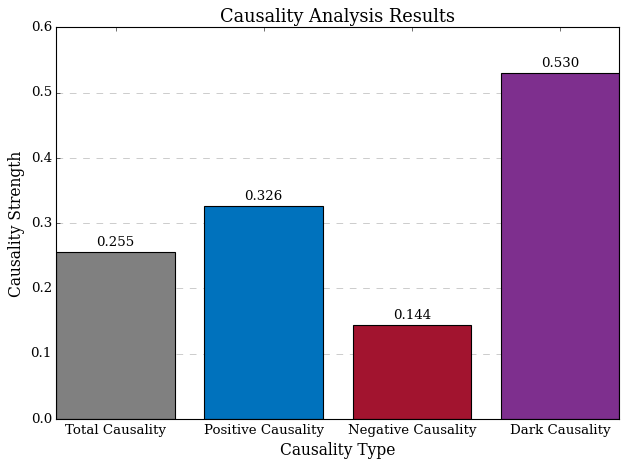

In [35]:
categories = results.columns.tolist()
values = results.iloc[0].values


color_mapping = {
    'Total Causality': (0.5, 0.5, 0.5),          
    'Positive Causality': (0, 0.4470, 0.7410),   
    'Negative Causality': (0.6350, 0.0780, 0.1840),
    'Dark Causality': (0.4940, 0.1840, 0.5560) 
}
colors = [color_mapping[cat] for cat in categories]

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(categories, values, color=colors, edgecolor='k', linewidth=1)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Causality Type', fontsize=14)
ax.set_ylabel('Causality Strength', fontsize=14)
ax.set_title('Causality Analysis Results', fontsize=16)

ax.yaxis.grid(True, linestyle='--', color='0.5', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()

plt.show()


## Advanced Usage

After the basic usage of `pc_lightweight`, we can use some other specific functions to do more analysis.

In [37]:
# Analyze causality patterns across multiple variables
matrix_result = pc.pc_matrix(
    dataset=data.drop(columns=["Date"]),
    E=3,
    tau=1,
    metric="euclidean",
    h=1,
    weighted=True
)

print("Pattern Causality Matrix Results:")
print(matrix_result)


Analyzing dataset with 4 variables
Parameters: E=3, tau=1, h=1

Dataset Statistics:
Variable 0: mean=0.016, std=1.026
Variable 1: mean=0.108, std=0.985
Variable 2: mean=0.067, std=1.045
Variable 3: mean=0.132, std=1.004

Analyzing pair (AO, AAO) - Progress: 1/12
Results for (AO, AAO):
  Positive: 0.446
  Negative: 0.141
  Dark: 0.414

Analyzing pair (AO, NAO) - Progress: 2/12
Results for (AO, NAO):
  Positive: 0.142
  Negative: 0.365
  Dark: 0.493

Analyzing pair (AO, PNA) - Progress: 3/12
Results for (AO, PNA):
  Positive: 0.338
  Negative: 0.210
  Dark: 0.452

Analyzing pair (AAO, AO) - Progress: 4/12
Results for (AAO, AO):
  Positive: 0.318
  Negative: 0.194
  Dark: 0.488

Analyzing pair (AAO, NAO) - Progress: 5/12
Results for (AAO, NAO):
  Positive: 0.295
  Negative: 0.300
  Dark: 0.405

Analyzing pair (AAO, PNA) - Progress: 6/12
Results for (AAO, PNA):
  Positive: 0.216
  Negative: 0.336
  Dark: 0.448

Analyzing pair (NAO, AO) - Progress: 7/12
Results for (NAO, AO):
  Positive: 0

To get better figure, the class has `to_matrix` method to convert the `pc_matrix` result to multiple matrix for ploting.

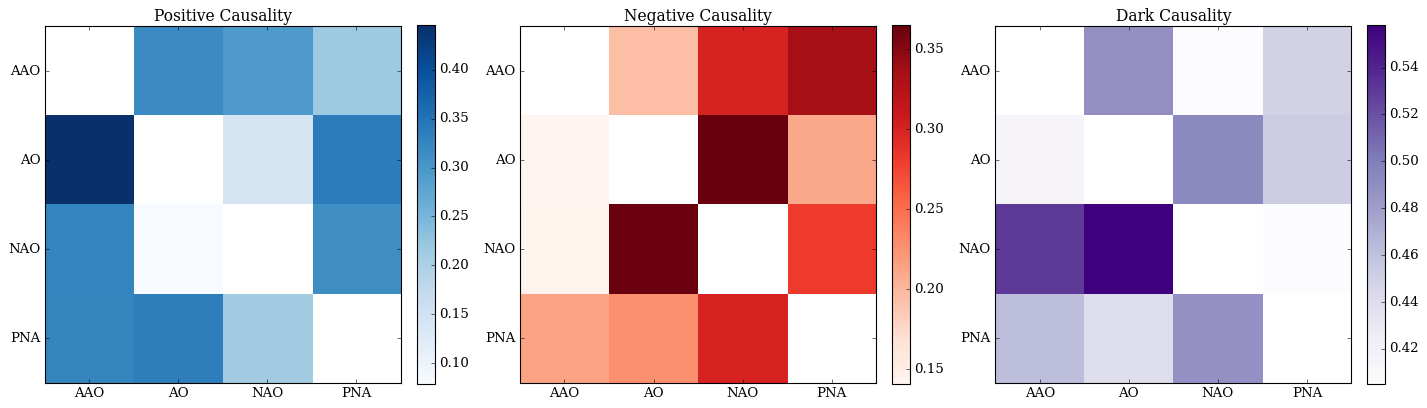

In [41]:
convert_matrix = pc.to_matrix(matrix_result)
cmap_mapping = {
    'positive': plt.get_cmap('Blues'),
    'negative': plt.get_cmap('Reds'),
    'dark':     plt.get_cmap('Purples')
}

for key, cmap in cmap_mapping.items():
    cmap.set_bad(color='white')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = {
    'positive': "Positive Causality",
    'negative': "Negative Causality",
    'dark':     "Dark Causality"
}

for ax, key in zip(axs, ['positive', 'negative', 'dark']):
    df = convert_matrix[key]
    data_masked = np.ma.masked_invalid(df.values)
    cmap = cmap_mapping[key]
    
    im = ax.imshow(data_masked, interpolation='nearest', cmap=cmap)
    
    ax.set_xticks(np.arange(df.shape[1]))
    ax.set_xticklabels(df.columns, fontsize=12)
    ax.set_yticks(np.arange(df.shape[0]))
    ax.set_yticklabels(df.index, fontsize=12)
    
    ax.set_title(titles[key], fontsize=14)
    
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


Then we can calculate the `pc_effect` followed by the matrix analysis, futhermore, we also provide the function to get the format effect results to draw the result better.

In [45]:
effects = pc.pc_effect(matrix_result)
convert_effect = pc.format_effects(effects)


Calculating causality effects...
Number of variables: 4

Positive Effects:
Mean Received: 83.61%
Mean Exerted: 83.61%
Mean Difference: 0.00%

Top Variables by Effect:
Received Effects:
  AAO: 109.66%
  PNA: 86.72%
  AO: 73.12%
Exerted Effects:
  AO: 92.59%
  PNA: 87.14%
  AAO: 82.86%

Negative Effects:
Mean Received: 76.85%
Mean Exerted: 76.85%
Mean Difference: 0.00%

Top Variables by Effect:
Received Effects:
  NAO: 96.46%
  PNA: 82.77%
  AO: 78.31%
Exerted Effects:
  AAO: 82.96%
  NAO: 78.86%
  PNA: 73.97%

Dark Effects:
Mean Received: 139.54%
Mean Exerted: 139.54%
Mean Difference: -0.00%

Top Variables by Effect:
Received Effects:
  AO: 148.56%
  AAO: 140.50%
  NAO: 138.60%
Exerted Effects:
  NAO: 149.29%
  PNA: 138.89%
  AO: 135.82%


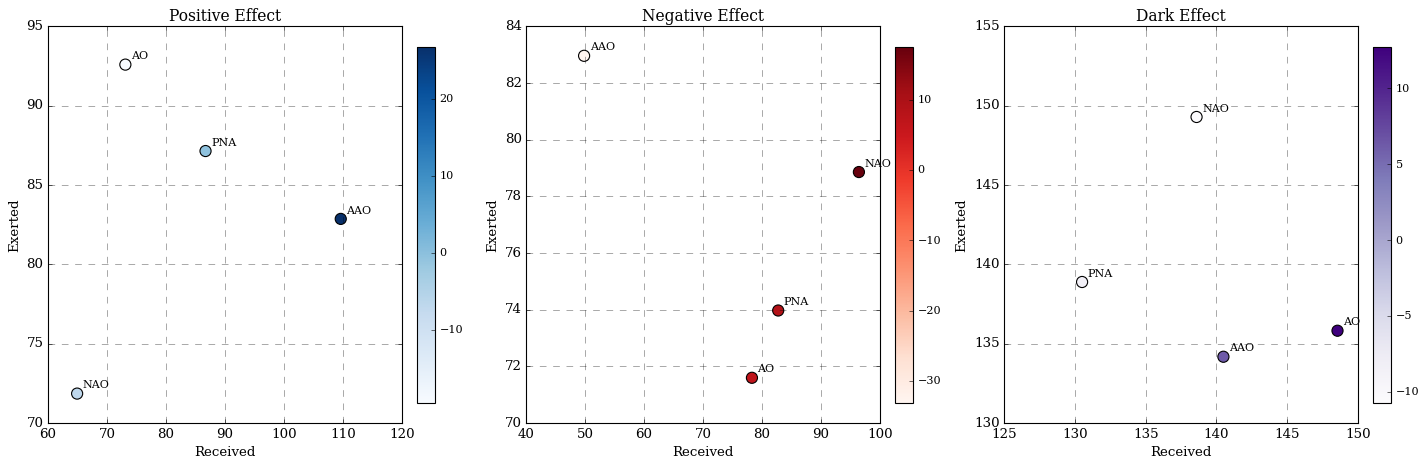

In [47]:
cmap_mapping = {
    'positive': plt.get_cmap('Blues'),
    'negative': plt.get_cmap('Reds'),
    'dark':     plt.get_cmap('Purples')
}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, effect in zip(axs, ['positive', 'negative', 'dark']):
    df = convert_effect[effect]
    
    scatter = ax.scatter(df['Received'], df['Exerted'],
                         c=df['Difference'],
                         cmap=cmap_mapping[effect],
                         s=100, edgecolor='k', linewidth=1)
    
    ax.set_title(f"{effect.capitalize()} Effect", fontsize=14)
    ax.set_xlabel("Received", fontsize=12)
    ax.set_ylabel("Exerted", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    for i, label in enumerate(df.index):
        ax.annotate(label,
                    (df['Received'].iloc[i], df['Exerted'].iloc[i]),
                    textcoords="offset points",
                    xytext=(5, 5),
                    fontsize=10)
    
    cbar = fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()


In this example, the number of points is really small, if we face the large dataset, it would be much more special.

What's more, the package also give the function to do **Cross Validation**, we can choose the number of resample in this process and get the result by `pc_cross_validation` method.

In [56]:
# Perform cross-validation
cv_results = pc.pc_cross_validation(
    X=data["NAO"].values,
    Y=data["AAO"].values,
    E=3,
    tau=1,
    metric="euclidean",
    h=1,
    weighted=True,
    numberset=list(range(100, 501, 20))
)

print("Cross-validation Results:")
print(cv_results)


Cross Validation Setup:
Total data points: 535
Sample sizes to test: [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]
Parameters: E=3, tau=1, h=1

Input Statistics:
X: mean=0.067, std=1.044
Y: mean=0.108, std=0.984
Correlation: 0.058

Processing sample size 100 (1/21)
Results for n=100:
  Positive: 0.326
  Negative: 0.388
  Dark: 0.286

Processing sample size 120 (2/21)
Results for n=120:
  Positive: 0.228
  Negative: 0.124
  Dark: 0.648

Processing sample size 140 (3/21)
Results for n=140:
  Positive: 0.451
  Negative: 0.327
  Dark: 0.222

Processing sample size 160 (4/21)
Results for n=160:
  Positive: 0.283
  Negative: 0.163
  Dark: 0.554

Processing sample size 180 (5/21)
Results for n=180:
  Positive: 0.389
  Negative: 0.160
  Dark: 0.452

Processing sample size 200 (6/21)
Results for n=200:
  Positive: 0.242
  Negative: 0.145
  Dark: 0.612

Processing sample size 220 (7/21)
Results for n=220:
  Positive: 0.348
  Negative: 

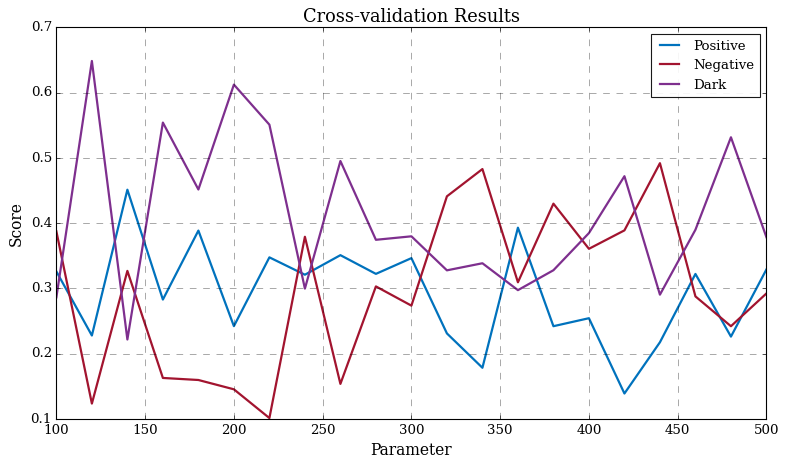

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(cv_results.index, cv_results['positive'], label='Positive', linewidth=2, color=(0, 0.4470, 0.7410))
ax.plot(cv_results.index, cv_results['negative'], label='Negative', linewidth=2, color=(0.6350, 0.0780, 0.1840))
ax.plot(cv_results.index, cv_results['dark'],     label='Dark',     linewidth=2, color=(0.4940, 0.1840, 0.5560))

ax.set_title('Cross-validation Results', fontsize=16)
ax.set_xlabel('Parameter', fontsize=14)
ax.set_ylabel('Score', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(fontsize=12, frameon=True, framealpha=0.9)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Then we can find the change in different lengths of series. Of course this part will be expanded by bootstrap method in the future, it would be much better by some other stable methods.

## Optimal Parameters

To observe the result in the whole system by different parameter pairs, we can use `optimal_parameters_search` method to get the mean result in the whole system to find the best parameters by total causality.

In [80]:
# Find optimal parameters
pc = pattern_causality(verbose=False)
optimal_params = pc.optimal_parameters_search(
    Emax=5,
    tau_max=3,
    metric="euclidean",
    h=1,
    dataset=data.drop(columns=["Date"])
)

print("Optimal Parameters:")
print(optimal_params)

Optimal Parameters:
    E  tau     Total  of which Positive  of which Negative  of which Dark
0   2    1  0.499842           0.498244           0.501093       0.000662
1   2    2  0.499842           0.501492           0.496290       0.002218
2   2    3  0.511291           0.529101           0.469659       0.001241
3   3    1  0.281905           0.273439           0.258000       0.468561
4   3    2  0.277991           0.286261           0.288414       0.425324
5   3    3  0.292876           0.322377           0.280662       0.396962
6   4    1  0.163314           0.142268           0.136887       0.720845
7   4    2  0.152616           0.143893           0.167255       0.688851
8   4    3  0.160458           0.184014           0.145682       0.670305
9   5    1  0.089435           0.077965           0.085213       0.836823
10  5    2  0.082518           0.085565           0.087930       0.826505
11  5    3  0.091120           0.121369           0.094499       0.784132


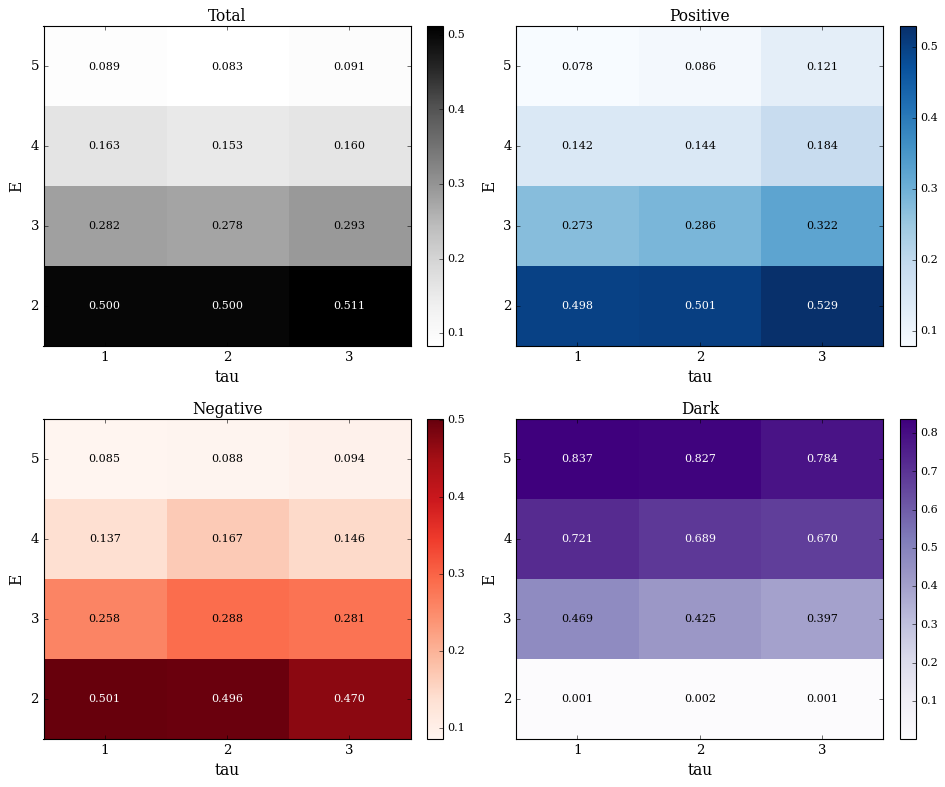

In [67]:
df_total    = optimal_params.pivot(index='E', columns='tau', values='Total')
df_positive = optimal_params.pivot(index='E', columns='tau', values='of which Positive')
df_negative = optimal_params.pivot(index='E', columns='tau', values='of which Negative')
df_dark     = optimal_params.pivot(index='E', columns='tau', values='of which Dark')

E_values   = sorted(optimal_params['E'].unique())    
tau_values = sorted(optimal_params['tau'].unique())

cmap_total    = plt.get_cmap('Greys')
cmap_positive = plt.get_cmap('Blues')
cmap_negative = plt.get_cmap('Reds')
cmap_dark     = plt.get_cmap('Purples')

def plot_heatmap(ax, df, title, cmap):
    data = df.values
    norm = plt.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data))
    im = ax.imshow(data, interpolation='nearest', cmap=cmap, origin='lower',
                   aspect='auto', norm=norm)
    
    ax.set_xticks(np.arange(len(tau_values)))
    ax.set_xticklabels(tau_values, fontsize=12)
    ax.set_yticks(np.arange(len(E_values)))
    ax.set_yticklabels(E_values, fontsize=12)
    ax.set_xlabel('tau', fontsize=14)
    ax.set_ylabel('E', fontsize=14)
    ax.set_title(title, fontsize=14)
    
    for i in range(len(E_values)):
        for j in range(len(tau_values)):
            val = data[i, j]
            rgba = cmap(norm(val))
            brightness = 0.299*rgba[0] + 0.587*rgba[1] + 0.114*rgba[2]
            text_color = 'white' if brightness < 0.5 else 'black'
            ax.text(j, i, f"{val:.3f}", ha="center", va="center",
                    color=text_color, fontsize=10)
    
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=10)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plot_heatmap(axs[0, 0], df_total,    'Total',    cmap_total)
plot_heatmap(axs[0, 1], df_positive, 'Positive', cmap_positive)
plot_heatmap(axs[1, 0], df_negative, 'Negative', cmap_negative)
plot_heatmap(axs[1, 1], df_dark,     'Dark',     cmap_dark)
plt.tight_layout()
plt.show()

### State Space

As for the state space for the time series, we can also find the reconstructed space by statespace function and visualize the state space in $E$ dimension space.

In [74]:
from pattern_causality import statespace
state_space = statespace(list(data['AO']),3,2)

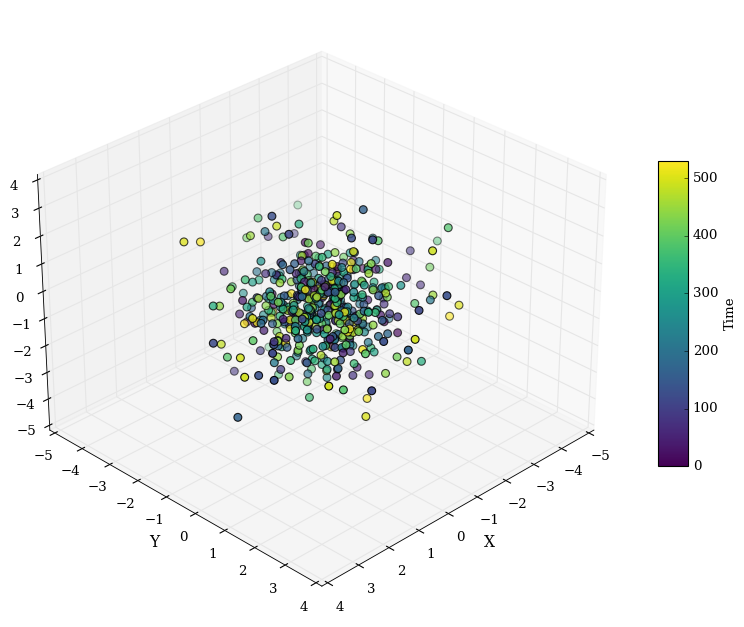

In [77]:
x = state_space[:, 0]
y = state_space[:, 1]
z = state_space[:, 2]

n_points = state_space.shape[0]
indices = np.arange(n_points)  # 0, 1, 2, ..., n-1

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=indices, cmap='viridis', s=50,
                     edgecolor='k', vmin=0, vmax=n_points-1)

ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14)

ax.view_init(elev=30, azim=45)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Time", fontsize=12)

plt.tight_layout()
plt.show()
